# Workshop on Tensorflow
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/): Tensor operations
2. [Numpy](https://www.numpy.org/): Linear Algebra operations
3. [Matplotlib](https://matplotlib.org): Plotting
4. [OS](https://docs.python.org/3/library/os.html): Operating system functionality
5. [Pandas](https://pandas.pydata.org/): Data analysis
6. [tqdm](https://tqdm.github.io/): Generates progress bar

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from tqdm import tqdm_notebook

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

%matplotlib inline

## Verifying import
print("Tensorflow version =",tf.__version__)

## Verifying whether tensorflow is using Graphic Processing Unit
print("Using GPU" if tf.test.is_built_with_cuda() else "Not using GPU")

Tensorflow version = 1.10.0
Using GPU


## Hello, Tensorflow!

In [2]:
message = tf.constant("Hello, Tensorflow")
sess = tf.Session()
print(sess.run(message).decode())
sess.close()

Hello, Tensorflow


## Creating Constant Scalars
**Reminder** <br/>
Scalars are tensors with rank 0<br/>
Vectors are tensors with rank 1<br/>
Scalars are tensors with rank 2<br/>
Constants are assigned value at declaration and value cannot be reassigned



In [3]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant(3.0)

## basic addition operation
z = x + y

## Creating and running a session
Computations are not run unless a tensorflow session is created <br/>
The graph is just static without a session<br/>
**Note: Do not forget to close session using tf.Session.close() to release hardware resources. <br/>
Failing to do so may lead to memory overflow**


In [4]:
## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run(z))

## closing session
sess.close()

5.0


## Creating 1-D and 2-D tensor
It is also possible to convert numpy arrays and matrices to tensorflow tensors.<br/>
Which is demonstrated in the following example <br/>
In the following example a numpy function [np.eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) is used, which returns an identity matrix

In [5]:
## tensorflow vector from list
z_arr = tf.constant([1,2,3,4])

## tensorflow matrix from nested list
z_mat = tf.constant([[1,0],[0,1]])

## tensosrflow vector from numpy vector
z_arr_np = tf.constant(np.array([1,2,3,4]))

## tensorflow vector from numpy matrix
z_mat_np = tf.constant(np.eye(2))

sess = tf.Session()

print("z_arr =", sess.run(z_arr))
print("z_mat =", sess.run(z_mat))
print("z_arr_np =", sess.run(z_arr_np))
print("z_mat_np =", sess.run(z_mat_np))

sess.close()

z_arr = [1 2 3 4]
z_mat = [[1 0]
 [0 1]]
z_arr_np = [1 2 3 4]
z_mat_np = [[1. 0.]
 [0. 1.]]


## Creating placeholders

Placeholders do not need to be specified value at declaration, but are later fed value through feed dictionary <br/>
At declaration, we need to specify shape and data type <br/>
Similar to numpy, tensorflow tensors also have shape attribute

In [6]:
placeholder1 = tf.placeholder(dtype = tf.float32, shape = [1,2,3,4])
print(placeholder1.shape)

(1, 2, 3, 4)


In [7]:
inp = 50 * np.random.rand(50, 1)
out = 1.24 * inp + 21.23 + 6 * np.random.rand(50, 1)
print(inp.shape)
print(out.shape)

(50, 1)
(50, 1)


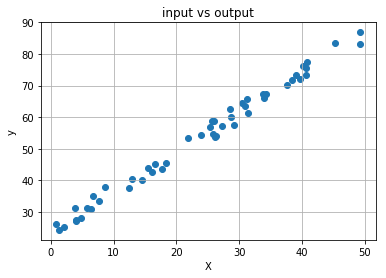

In [8]:
plt.scatter(inp, out)
plt.xlabel("X")
plt.ylabel("y")
plt.title("input vs output")
plt.grid(True)

In [9]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
b = tf.get_variable(dtype = tf.float32, name = "bias", shape = [1], initializer = tf.initializers.random_normal)

In [10]:
def getPrediction(W, X, b):
    return X*W + b

In [11]:
def loss(W, X, y, b):
    pred = getPrediction(W, X, b)
    return tf.losses.mean_squared_error(pred, y)

In [12]:
cost = loss(W, X, y, b)
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()
weights = {}
costCache = []

Iteration:0, Loss = 7874.37255859375
Iteration:1000, Loss = 58.941314697265625
Iteration:2000, Loss = 23.493318557739258
Iteration:3000, Loss = 10.572092056274414
Iteration:4000, Loss = 5.862114429473877
Iteration:5000, Loss = 4.1452789306640625
Iteration:6000, Loss = 3.5194602012634277
Iteration:7000, Loss = 3.291342258453369
Iteration:8000, Loss = 3.2081961631774902
Iteration:9000, Loss = 3.177884101867676
Iteration:10000, Loss = 3.1668384075164795
Iteration:11000, Loss = 3.1628100872039795
Iteration:12000, Loss = 3.161342144012451
Iteration:13000, Loss = 3.1608076095581055
Iteration:14000, Loss = 3.160611629486084
Iteration:15000, Loss = 3.1605420112609863
Iteration:16000, Loss = 3.1605148315429688
Iteration:17000, Loss = 3.160505771636963
Iteration:18000, Loss = 3.1605026721954346
Iteration:19000, Loss = 3.160501003265381
CPU times: user 20.7 s, sys: 1.74 s, total: 22.5 s
Wall time: 12.7 s


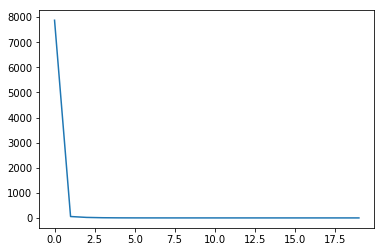

In [13]:
%%time
with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(2*10**4):
        _, currentCost = sess.run([optimizer, cost], feed_dict = {X: inp, y: out})
        if num_iter % 10**3 == 0:
            costCache.append(currentCost)
            print("Iteration:{}, Loss = {}".format(num_iter, currentCost))
    weights["weight"], weights["bias"] = W.eval(), b.eval()
    plt.plot(costCache)

In [14]:
print(weights)

{'bias': array([23.564442], dtype=float32), 'weight': array([1.2683778], dtype=float32)}


## Single layer perceptron with multiple features
Dataset is loaded from tensorflow keras module <br/>
The dataset we have loaded consists of black and white handwritten images of digits (0-9), called [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/) <br/>
Training Dataset consists of 60000 28 x 28 images <br/>
Test Dataset consists of 10000 28 x 28 images <br/>

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
num_images, img_width, img_height = x_train.shape
num_classes = y_train.shape[0]
print("Number of images = {} \nWidth of each image = {} \nHeight of each image = {}".format(num_images, img_width, img_height))

Number of images = 60000 
Width of each image = 28 
Height of each image = 28


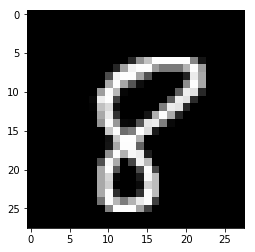

In [17]:
## displaying a random image
plt.imshow(x_train[np.random.choice(num_images), :, :], cmap = 'gray')

In [18]:
slp_X = tf.placeholder(dtype = tf.float32, shape = [None, img_width * img_height])
slp_y = tf.placeholder(dtype = tf.int32, shape = [None, num_classes])
slp_W = tf.get_variable(dtype = tf.float32, shape = [img_width * img_height, num_classes], name = "weight_slp")
slp_b = tf.get_variable(dtype = tf.float32, shape = [num_classes], name = "bias_slp")

In [19]:
def getProbability(W, X, b):
    return tf.nn.softmax(tf.matmul(X,W) + b)

In [20]:
def getLossSLP(W, X, y, b):
    return tf.nn.softmax_cross_entropy_with_logits_v2(logits = getProbability(W, X, b), labels = tf.one_hot(y, num_classes))

In [21]:
cost = getLossSLP(slp_W, slp_X, slp_y, slp_b)
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()
weights = {}
costCache = []
x_train = np.reshape(x_train, [num_images, img_width * img_height])

In [22]:
%%time

with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(2*10**4):
        _, currentCost = sess.run([optimizer, cost], feed_dict = {slp_X: x_train, slp_y: y_train})
        if num_iter % 10**3 == 0:
            costCache.append(currentCost)
            print("Iteration:{}, Loss = {}".format(num_iter, currentCost))
    weights["weight"], weights["bias"] = W.eval(), b.eval()
    plt.plot(costCache)

ValueError: Cannot feed value of shape (60000,) for Tensor 'Placeholder_4:0', which has shape '(?, 60000)'

In [23]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.float32, shape = [None, 10])


tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format("board"))
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks = [tensorboard])
model.evaluate(x_test, y_test)

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (60000, 784)

In [ ]:
model.summary()

In [ ]:
x_train.shape